In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(8425, 23)

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [21]:
# filling missing values for numerical columns with the mean

df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

In [26]:
# filling missing values for categorical columns with mode

df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

In [27]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,23.859976,0.0,5.389395,7.632205,N,40.174469,ESE,...,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,No,No


In [31]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [32]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,2017-06-22,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,2017-06-23,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,2017-06-24,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0
8424,2017-06-25,9,14.9,23.859976,0.0,5.389395,7.632205,3,40.174469,2,...,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,0,0


In [37]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                      'Temp9am', 'Temp3pm']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,0.038425,-0.157009,-0.213986,-1.361314e-16,7.147615e-17,13,0.277710,13,...,0.189439,-1.597406,-1.584003,-1.308665,1.413459e+00,1.636343e-16,-0.153712,-0.108138,0,0
1,2008-12-02,1,-1.076989,0.202812,-0.272189,-1.361314e-16,7.147615e-17,14,0.277710,6,...,-1.420268,-1.433568,-1.121880,-1.196072,1.248194e-16,1.636343e-16,-0.100217,0.312348,0,0
2,2008-12-03,1,-0.054526,0.300945,-0.272189,-1.361314e-16,7.147615e-17,15,0.422897,13,...,-1.777981,-1.160505,-1.599939,-1.051309,1.248194e-16,-1.088680e+00,0.577390,0.127334,0,0
3,2008-12-04,1,-0.742365,0.677121,-0.272189,-1.361314e-16,7.147615e-17,4,-1.174166,9,...,-1.360650,-1.925081,-0.006411,-0.391836,1.248194e-16,1.636343e-16,0.060269,0.682376,0,0
4,2008-12-05,1,0.800625,1.380408,-0.175183,-1.361314e-16,7.147615e-17,13,0.059928,1,...,0.845246,-0.996668,-1.090010,-1.485596,1.001777e+00,1.520830e+00,0.006773,1.220599,0,0


In [44]:
# Split data into features and target variables
X = df.drop(['Date', 'RainTomorrow'], axis=1)
y_classification = df['RainTomorrow']
y_regression = df['Rainfall']

In [50]:
# Split into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [55]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [59]:
# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [64]:
# Predict on test data
y_pred_class = rf_classifier.predict(X_test_class)
y_pred_reg = rf_regressor.predict(X_test_reg)

In [69]:
# Classification report
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1314
           1       0.86      0.71      0.78       371

    accuracy                           0.91      1685
   macro avg       0.89      0.84      0.86      1685
weighted avg       0.91      0.91      0.91      1685



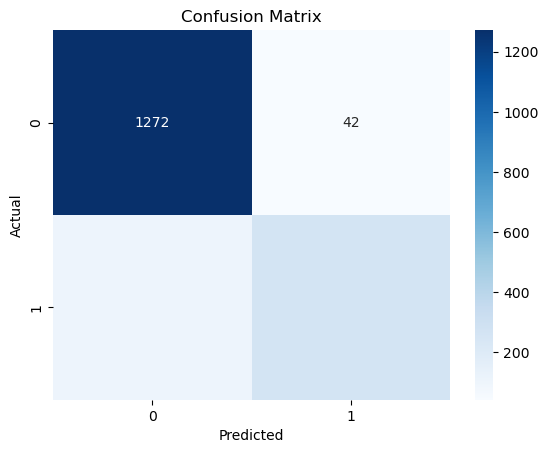

In [81]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
# Regression evaluation
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

In [90]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 0.004083268427137695
Mean Squared Error: 0.00502722108813641
Root Mean Squared Error: 0.07090289901080497


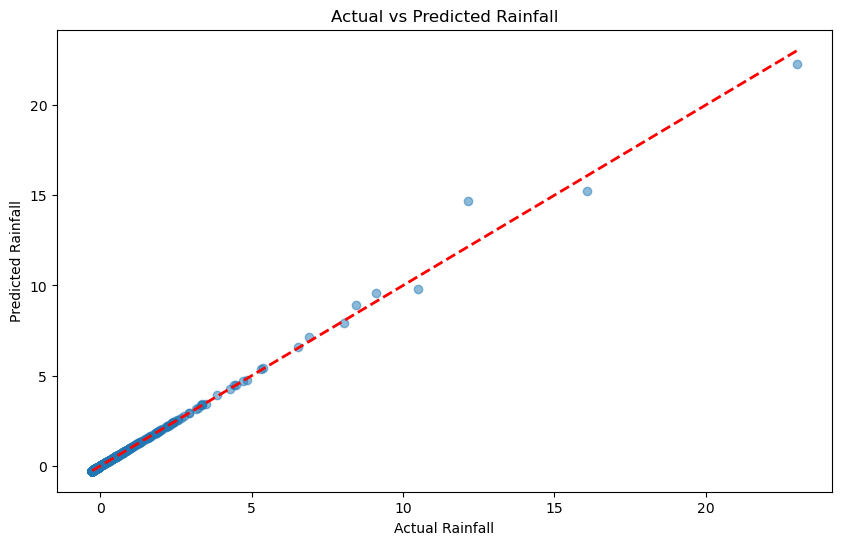

In [104]:
# Plot actual vs predicted rainfall
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r', linewidth=2)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()